In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import os
np.seterr(invalid='ignore')
from PPP import PPP
from defense_PPP import defense_PPP
from court import create_court
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import plotly.graph_objects as go
pd.options.display.max_columns = 999
from get_stats import get_stats

game = '11.12.23_Rockets'
total = '!season_totals'

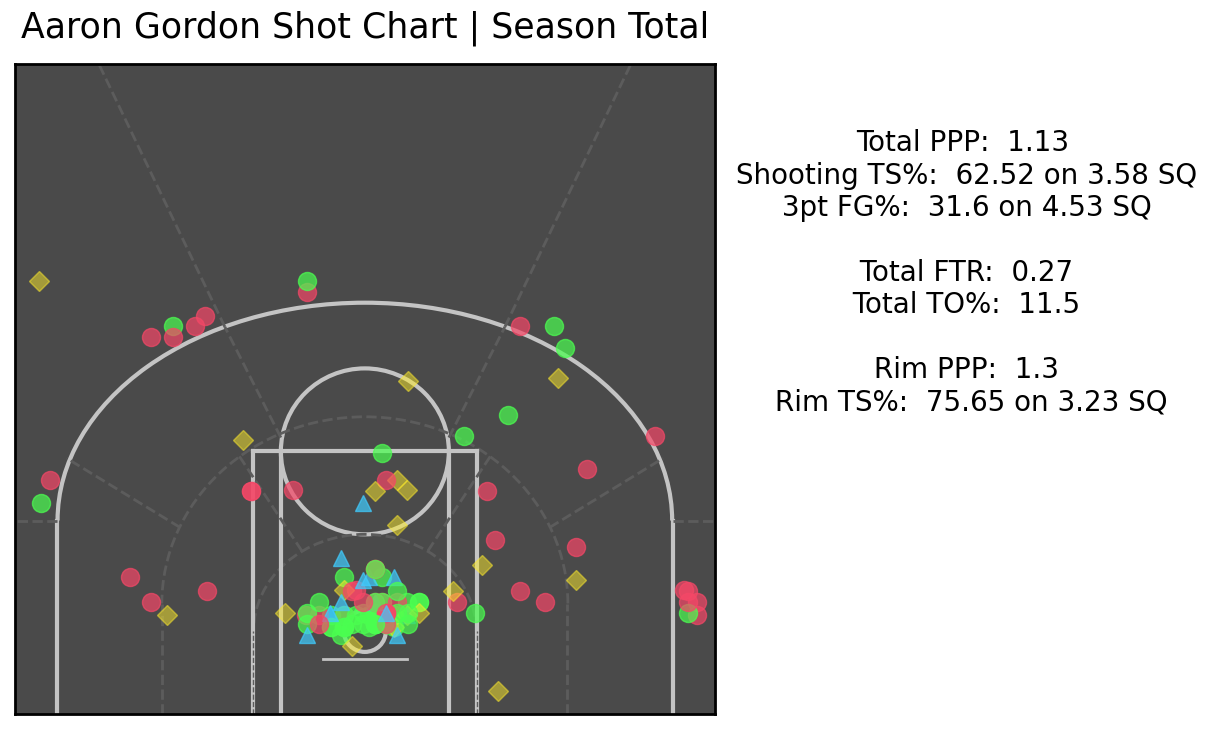

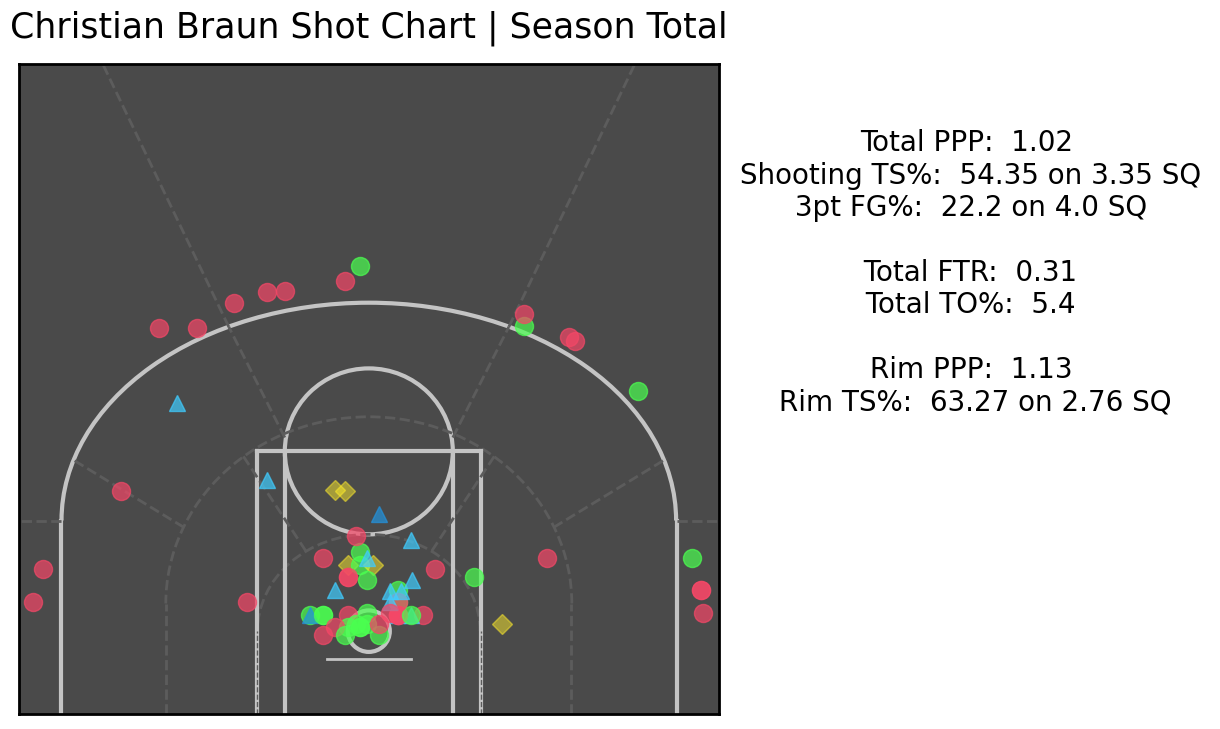

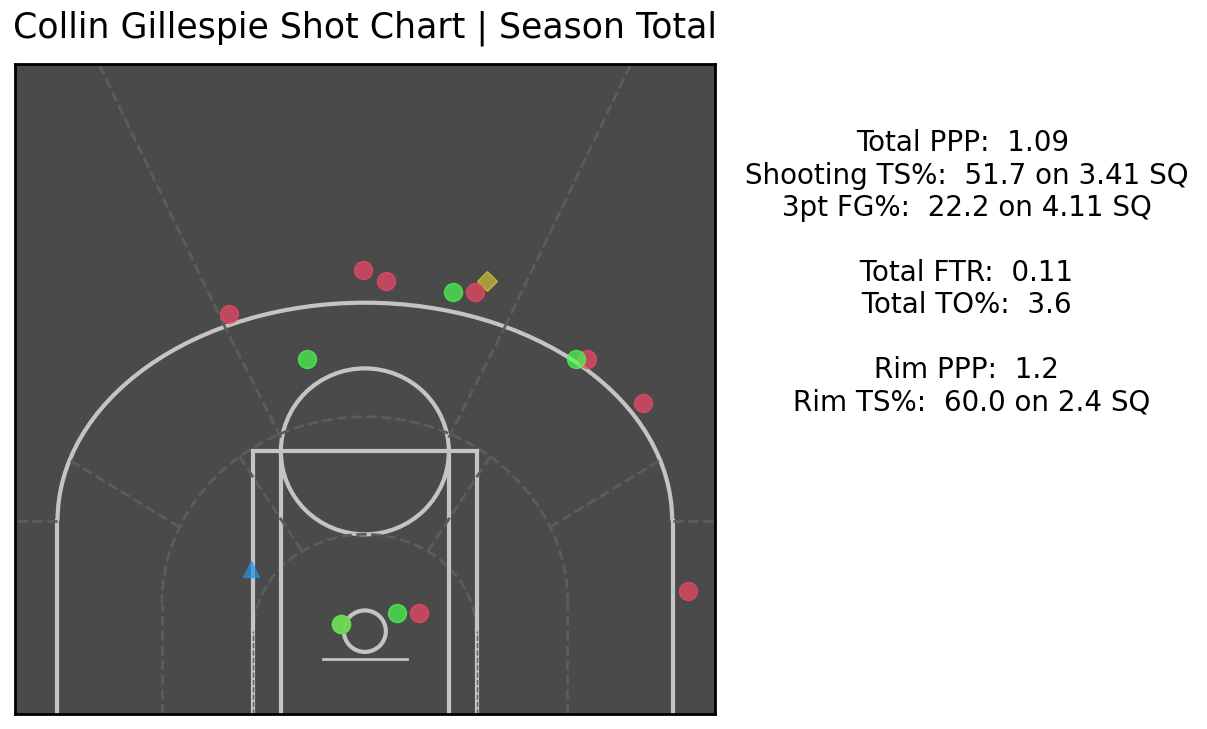

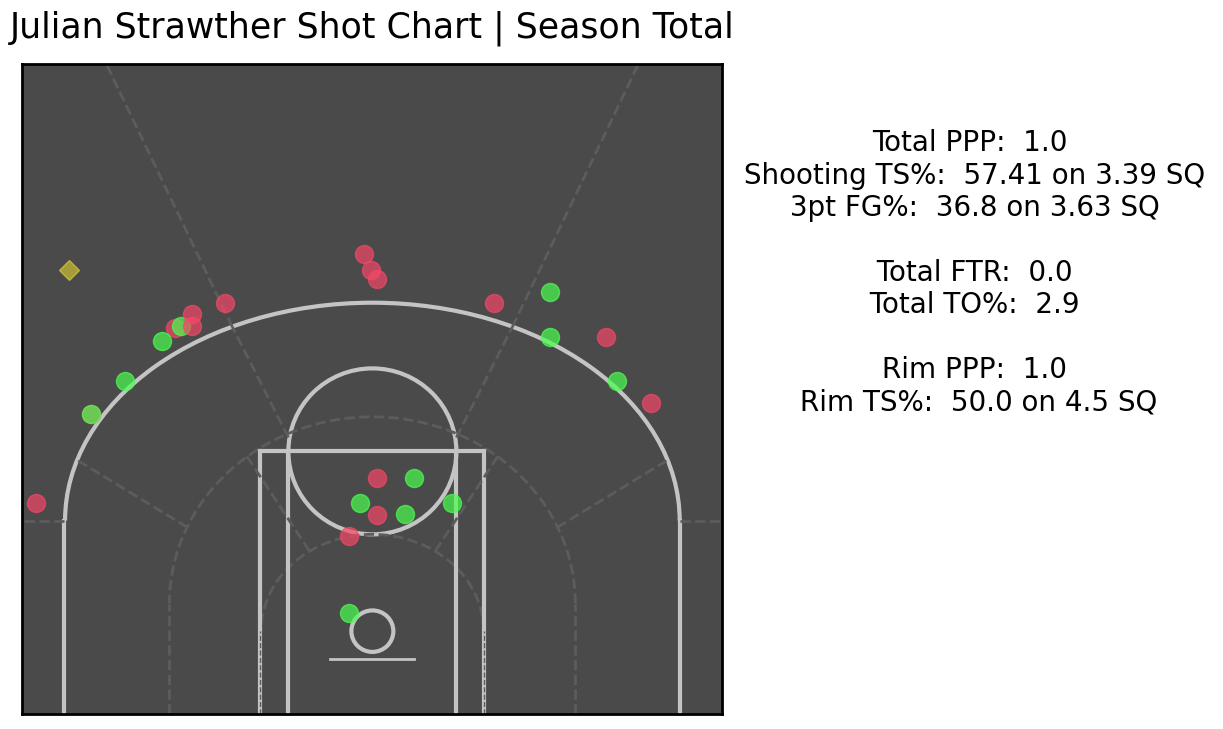

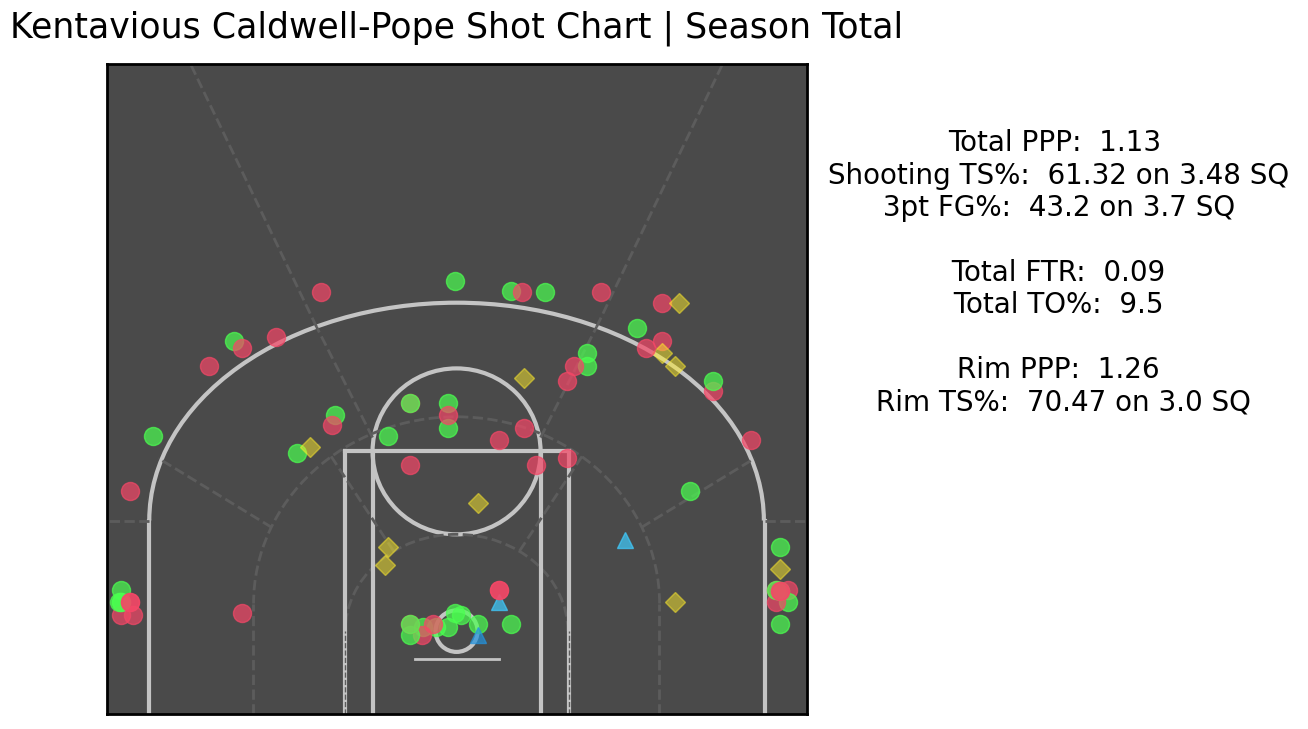

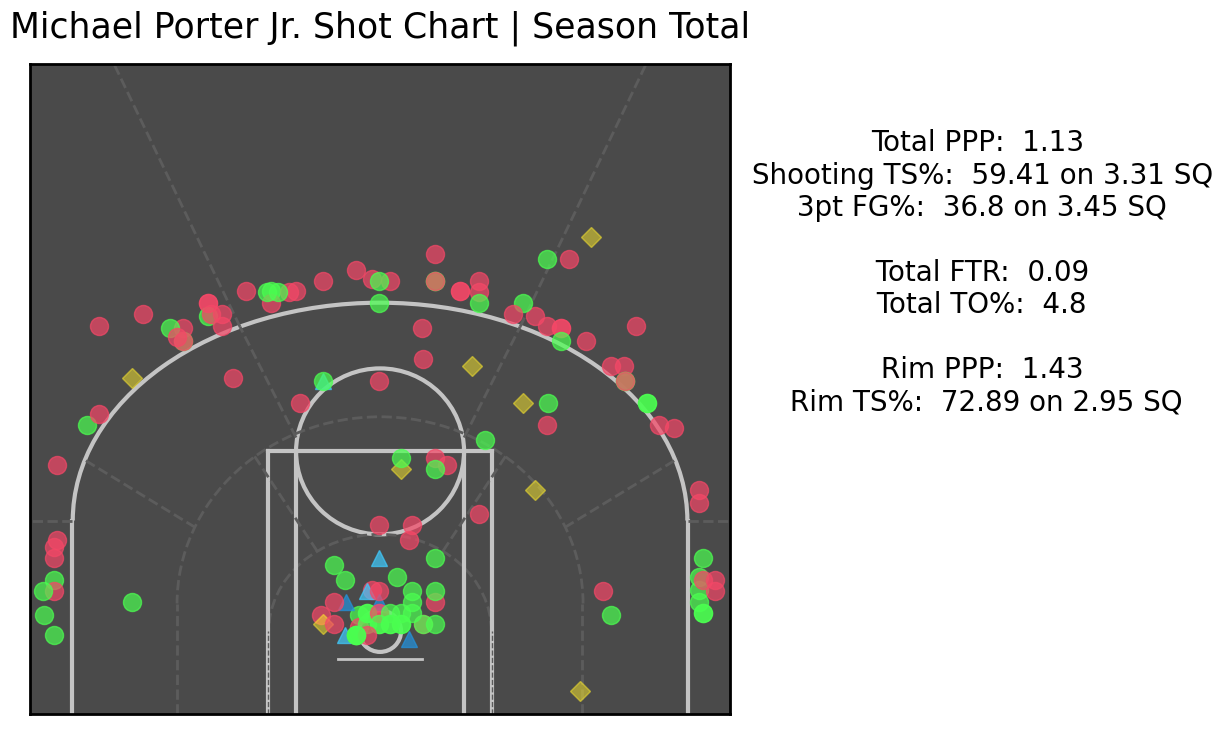

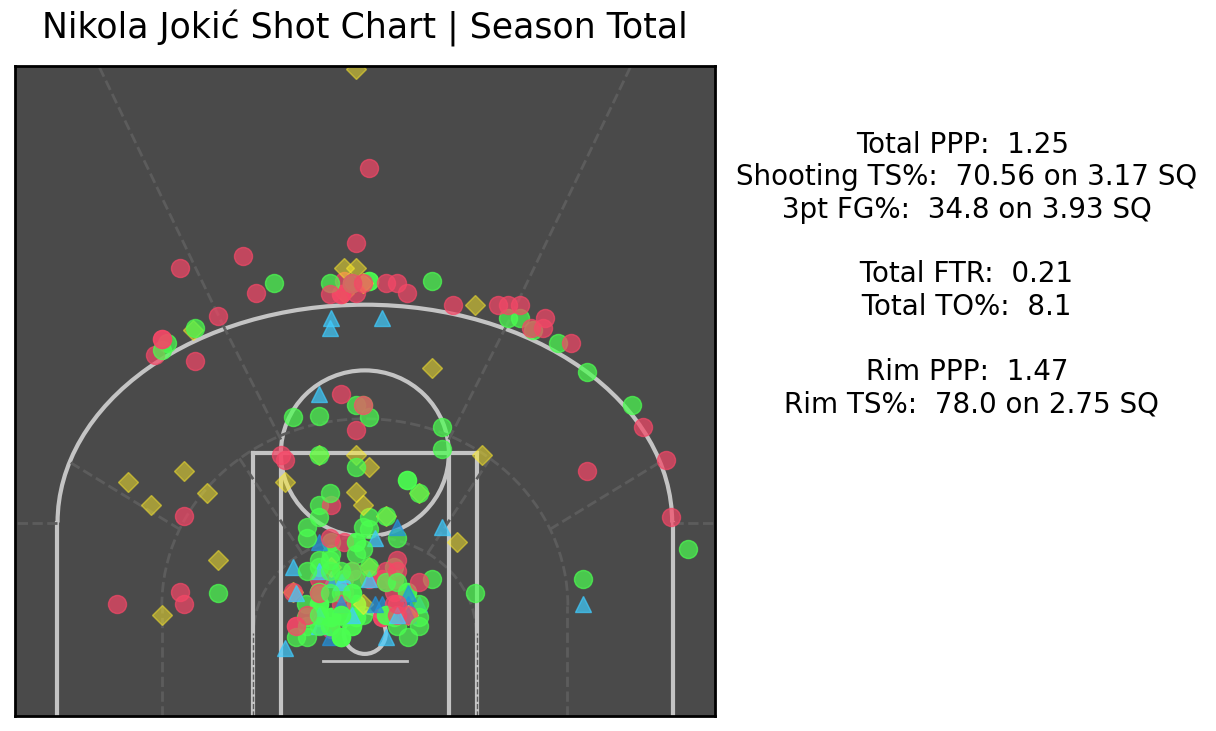

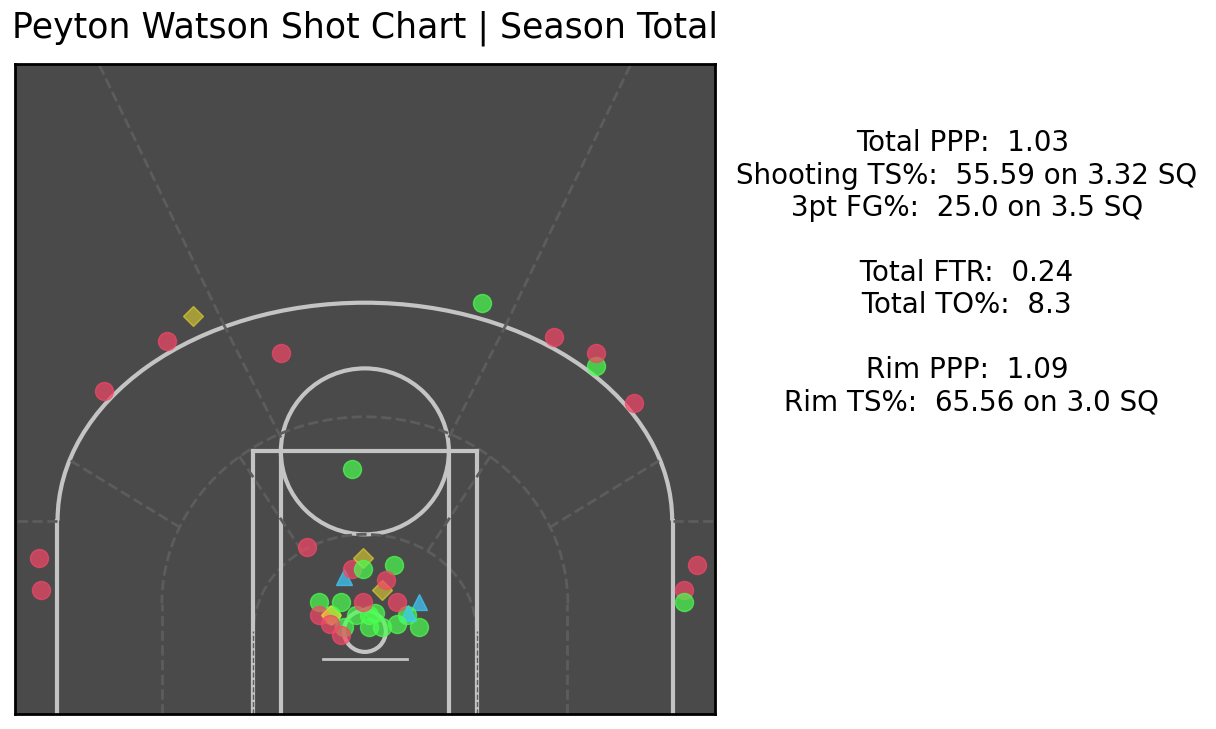

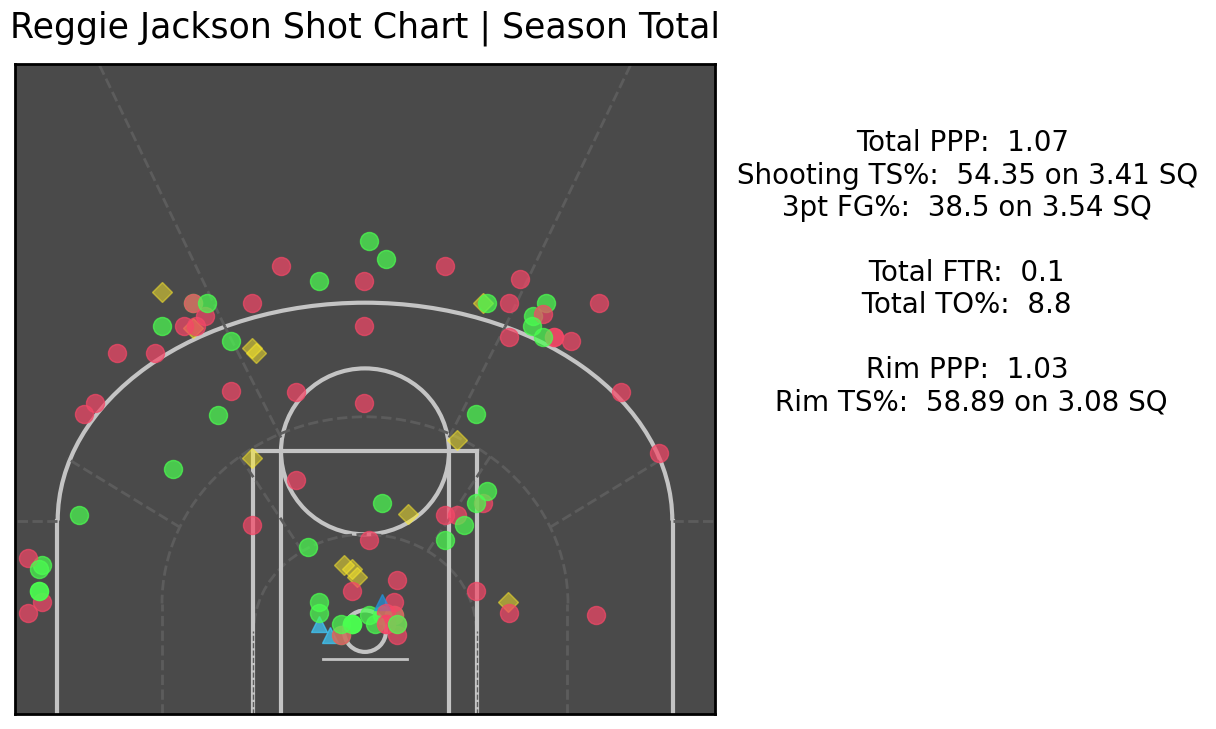

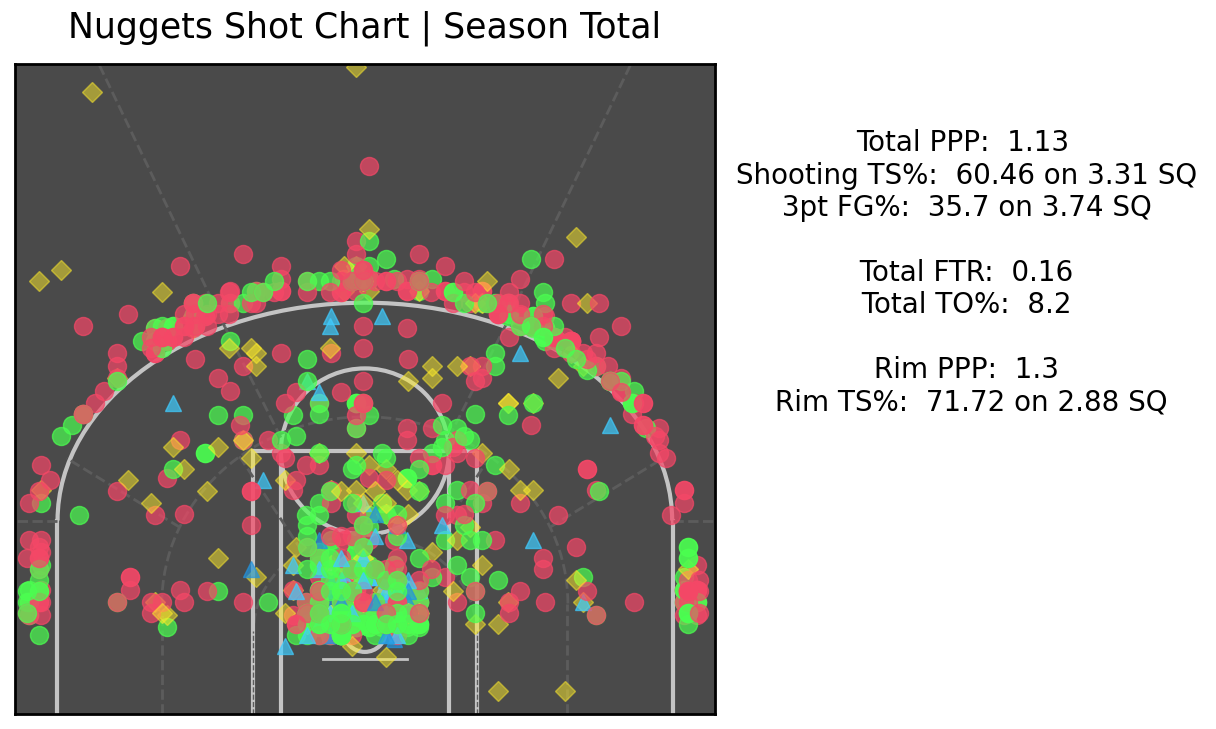

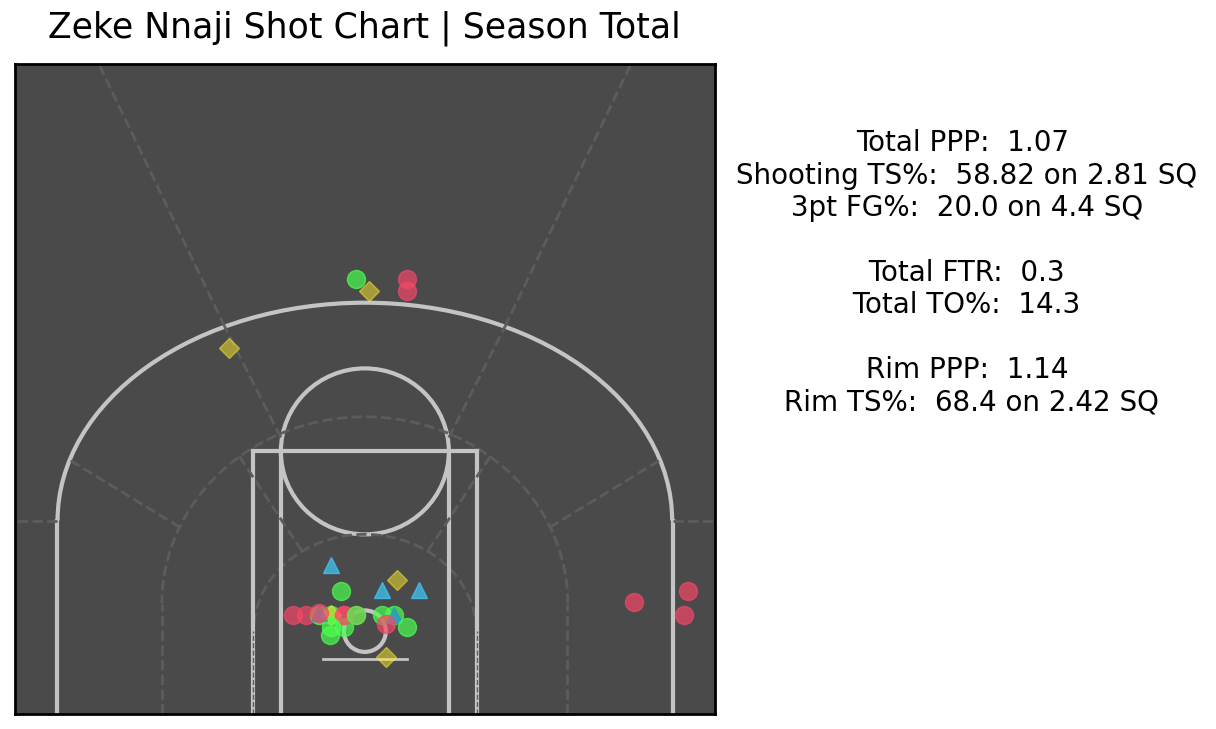

In [39]:
total_folder = 'Nuggets/!season_totals'
game_dir = f'data/{game}/Nuggets/Offense'

players = []
for subdir, dirs, files in os.walk(game_dir):
    for file in files:
        if file[-5:] == '.json':
            player = file[:-5]
            players.append(player)

for player in players:
    if player[-10:] != 'checkpoint':
        get_stats('Nuggets', player, total, 'Offense')

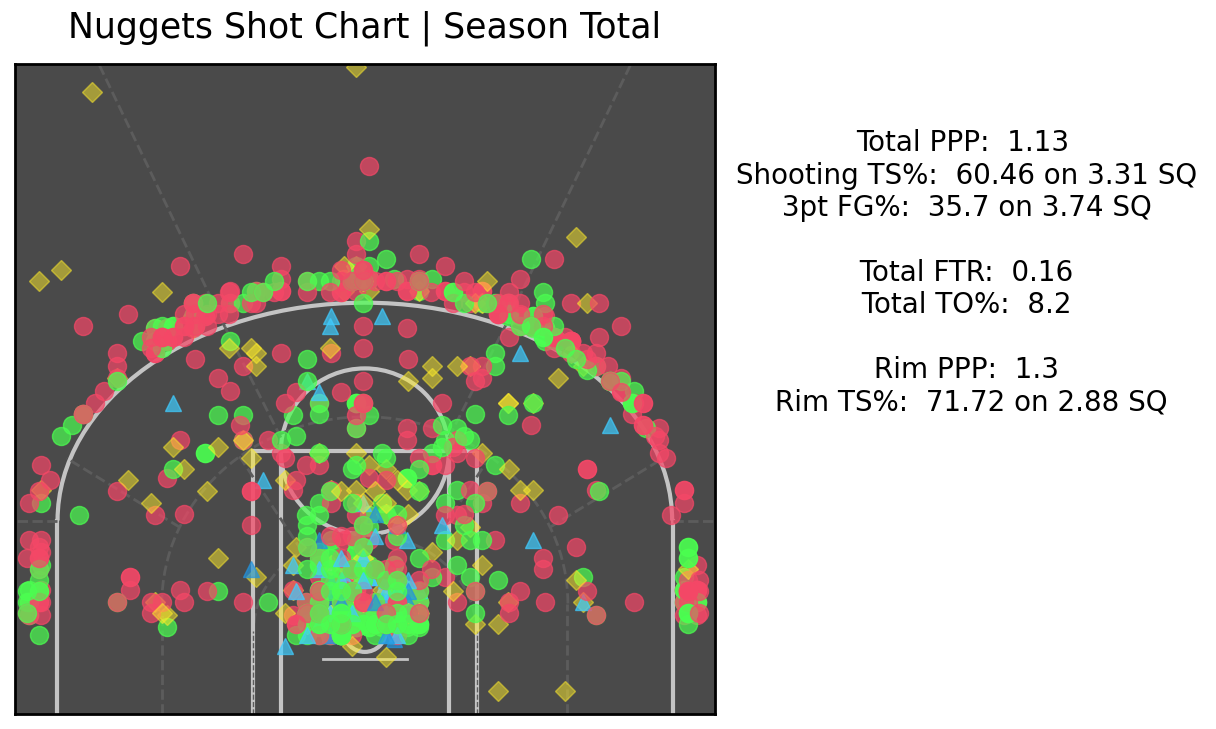

In [20]:
off_PPP, off_rim_PPP, shot_chart = get_stats('Nuggets', 'Team', total, 'Offense')

In [3]:
off_PPP

,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,1.09,17.5,0,31.8,0.0,54.55,3.09,15,60.0,2.6,7,28.6,4.14,1.2,14.6,0,68.2,0.0,60.0,3.2,10,60.0,2.9,5,40.0,3.8,0.86,30.4,0,31.8,0.0,42.86,2.86,5,60.0,2.0,2,0.0,3.8
PNR Screener,0.87,5.5,1,14.5,0.4,51.02,2.8,3,66.7,1.67,2,0.0,4.5,1.02,5.7,1,85.5,0.5,61.48,2.5,4,66.7,1.67,1,0.0,5.0,0.0,4.3,0,14.5,0.0,0.0,4.0,0,N/A,N/A,1,0.0,5.0
DHO Ball Handler,0.67,4.8,0,16.7,0.0,33.33,3.33,3,66.7,3.0,3,0.0,3.67,0.8,4.9,0,83.3,0.0,40.0,3.4,3,66.7,3.0,2,0.0,4.0,0.0,4.3,0,16.7,0.0,0.0,3.0,0,N/A,N/A,1,0.0,4.0
DHO Screener,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
ISOLATION,0.78,35.7,5,22.2,0.25,45.29,2.81,26,38.5,2.58,10,30.0,3.4,0.69,33.9,5,77.8,0.35,41.9,2.5,33,36.0,2.48,1,0.0,3.0,1.1,43.5,0,22.2,0.0,55.0,3.6,1,100.0,5.0,9,33.3,3.0
TRANSITION,1.08,5.9,2,13.4,0.2,73.53,2.8,3,66.7,2.0,2,50.0,4.0,0.93,6.3,2,86.6,0.25,67.57,2.25,3,50.0,0.5,3,50.0,4.0,2.0,4.3,0,13.4,0.0,100.0,5.0,1,100.0,5.0,0,N/A,4.0
Attacking Closeouts,1.75,3.2,0,0.0,0.0,87.5,4.5,2,100.0,4.5,2,50.0,4.5,1.75,3.9,0,100.0,0.0,87.5,4.5,2,100.0,4.5,2,50.0,4.5,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,4.5
Catch & Shoot,0.56,12.7,0,0.0,0.0,28.12,3.69,0,N/A,N/A,16,18.8,3.69,0.56,15.5,0,100.0,0.0,28.12,3.69,0,N/A,N/A,16,18.8,3.69,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,3.69
Off Ball Screens,1.6,4.0,0,0.0,0.0,80.0,4.0,2,50.0,4.5,3,66.7,3.67,1.6,4.9,0,100.0,0.0,80.0,4.0,2,50.0,4.5,3,66.7,3.67,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,3.67
Cutting,1.33,4.8,1,16.7,0.0,80.0,3.8,5,80.0,3.8,0,N/A,N/A,1.2,4.9,1,83.3,0.0,75.0,3.75,5,75.0,3.75,0,N/A,N/A,2.0,4.3,0,16.7,0.0,100.0,4.0,1,100.0,4.0,0,N/A,N/A


C:\Users\nickd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


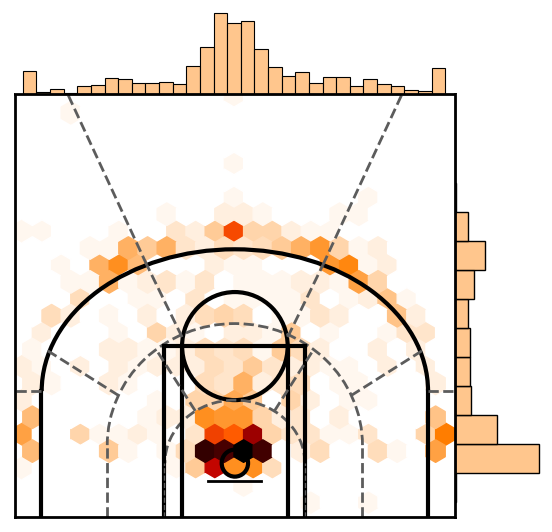

In [37]:
path = f'data/!season_totals/Nuggets/Offense/Team.json'

with open (path, 'r') as o:
    offense_file = json.load(o)
    
shots_x = [shot[0][0] for shot in offense_file['ovr_data']['shooting_locations']]
shots_y = [shot[0][1] + 60 for shot in offense_file['ovr_data']['shooting_locations']]
shots_results = [shot[1] for shot in offense_file['ovr_data']['shooting_locations']]

shots_df = pd.DataFrame(columns=['LOC_X', 'LOC_Y', 'RESULT'])
shots_df['LOC_X'] = shots_x
shots_df['LOC_Y'] = shots_y
shots_df['RESULT'] = shots_results

cmap=plt.cm.gist_heat_r

joint_shot_chart = sns.jointplot(shots_df.LOC_X, shots_df.LOC_Y,
                                 kind='hex', space=0, color=cmap(.15), cmap=cmap)

joint_shot_chart.fig.set_size_inches(7,6.5)

ax = joint_shot_chart.ax_joint
create_court(ax, 'black')

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

#ax.set_title("Nuggets FGA's 2023-24", y=1.2, fontsize=18)